In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

# MNIST 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터를 4x8로 출력하기
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')

pyplot.show()


<Figure size 640x480 with 32 Axes>

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# 데이터를 28*28=784의 1차원 배열로 변환하기
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [6]:
# 입력과 출력 지정하기
in_size = 28 * 28
out_size = 10

# 모델의 구조 정의하기
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기
model.fit(X_train, y_train,
    batch_size=20, epochs=20)

# 모델 평가하기
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.1878 - accuracy: 0.9434
Epoch 2/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.0794 - accuracy: 0.9755
Epoch 3/20
60000/60000 [==============================] - 30s 505us/step - loss: 0.0516 - accuracy: 0.9833
Epoch 4/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0367 - accuracy: 0.9876
Epoch 5/20
60000/60000 [==============================] - 30s 500us/step - loss: 0.0268 - accuracy: 0.9910
Epoch 6/20
60000/60000 [==============================] - 31s 509us/step - loss: 0.0228 - accuracy: 0.9920
Epoch 7/20
60000/60000 [==============================] - 31s 515us/step - loss: 0.0196 - accuracy: 0.9934
Epoch 8/20
60000/60000 [==============================] - 27s 443us/step - loss: 0.0143 - accuracy: 0.9950
Epoch 9/20
60000/60000 [

In [7]:

# MLP로 MNIST 분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 입력과 출력 지정하기
in_size = 28 * 28
out_size = 10

# MNIST 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터를 28*28=784의 1차원 배열로 변환하기
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLP모델의 구조 정의하기 --- (*2)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# 모델 구축하기 --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 학습 실행하기 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.2466 - accuracy: 0.9240 - val_loss: 0.1124 - val_accuracy: 0.9643
Epoch 2/50
60000/60000 [==============================] - 10s 161us/step - loss: 0.1023 - accuracy: 0.9690 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 3/50
60000/60000 [==============================] - 10s 162us/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 4/50
60000/60000 [==============================] - 10s 165us/step - loss: 0.0608 - accuracy: 0.9822 - val_loss: 0.0713 - val_accuracy: 0.9806
Epoch 5/50
60000/60000 [==============================] - 9s 158us/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0737 - val_accuracy: 0.9809
Epoch 6/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.0813 - val_accuracy: 0.9796
Epoch 7/50
60000/60000 [==============================] - 1

KeyError: 'acc'

10000/10000 [==============================] - 0s 44us/step
정답률= 0.9846000075340271 loss= 0.1476009870157709


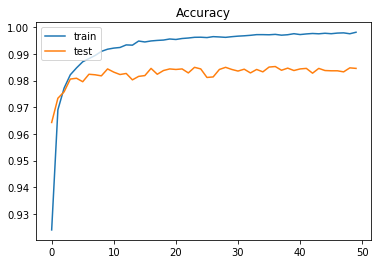

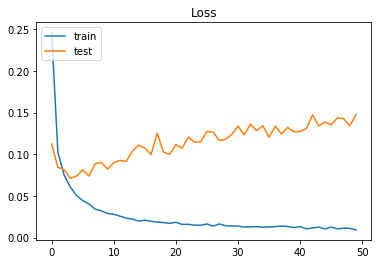

In [9]:
# 모델 평가하기 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*6)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# CNN으로 MNIST 분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 입력과 출력 지정하기
in_shape = (28, 28, 1)
out_size = 10

# MNIST 데이터 읽어 들이기 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 읽어들인 데이터를 3차원 배열로 변환하기
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# CNN모델의 구조 정의하기 --- (*2)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=in_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(out_size, activation='softmax'))

# 모델 구축하기 --- (*3)
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# 학습 실행하기 --- (*4)
hist = model.fit(X_train, y_train,batch_size=128,epochs=12,verbose=1,validation_data=(X_test, y_test))

# 모델 평가하기 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*6)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2299 - accuracy: 0.9310 - val_loss: 0.0653 - val_accuracy: 0.9795
Epoch 2/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0866 - accuracy: 0.9743 - val_loss: 0.0470 - val_accuracy: 0.9845
Epoch 3/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0654 - accuracy: 0.9810 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 4/12
23168/60000 [==========>...................] - ETA: 1:08 - loss: 0.0544 - accuracy: 0.9846

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 읽어들인 데이터를 3차원 배열로 변환하기
X_train = X_train.reshape(-1, 28, 28, 1)
X_train